# Import package 
(first you need install energyflow :pip install energyflow)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import energyflow
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt


# Define function

In [2]:
def Image_to_EFP_inputs(x, R = 1.2):
    bins = x.shape
    eta = np.zeros(bins)
    eta[:] = (np.arange(bins[0])-bins[0]/2+0.5)/bins[0]*R
    phi = np.zeros(bins)
    phi[:] = (np.arange(bins[0])-bins[0]/2+0.5)/bins[0]*R
    phi = np.transpose(phi, [1,0])
    basis = x!=0
    basis = basis.astype(np.int32)
    eta = basis*eta
    phi = basis*phi
    m = basis*0
    
    eta = eta.flatten()
    phi = phi.flatten()
    pt = x.flatten()
    m = m.flatten()
    
    eta = np.expand_dims(eta, axis = -1)
    pt = np.expand_dims(pt, axis = -1)
    phi = np.expand_dims(phi, axis = -1)
    m = np.expand_dims(m, axis = -1)
    basis = basis.flatten()
    
    rs = np.concatenate([pt, eta, phi, m], axis=-1)
    rs = rs[basis!=0]
    return rs

def image_to_EFP(x, dmax = 5, beta = 0.5):
    x = Image_to_EFP_inputs(x)
    efp = energyflow.EFPSet(('d<=', dmax), measure='hadr', beta=beta,coords='ptyphim').compute(event = x, zs=None, thetas=None, nhats=None,  batch_call= None)
    return efp

# Load data

In [3]:
outfile = "/home/ja2006203966/script/Network/data/H5/CNN/Train.h5"
hf = h5py.File(outfile, 'r')
print(hf.keys())
# lb = ['mask', 'points', 'features']
X_train = hf["X_train"][()]
X_val = hf["X_val"][()]
X_test = hf["X_test"][()]


y_train = hf["y_train"][()]
y_val = hf["y_val"][()]
y_test = hf["y_test"][()]

hf.close()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


# Calculate EFP

In [5]:
## I think this part need to speed up
SVJ_EFP = []
QCDJ_EFP = []

for i in tqdm(range(2000)):
    if y_train[i] == 1:
        SVJ_EFP.append(image_to_EFP(X_train[i]))
    if y_train[i] == 0:
        QCDJ_EFP.append(image_to_EFP(X_train[i]))



100%|██████████| 2000/2000 [04:18<00:00,  7.75it/s]


# Show EFP plot and save as PNG

In [7]:
SVJ_EFP[0].shape[0]

102

100%|██████████| 102/102 [00:02<00:00, 35.40it/s]


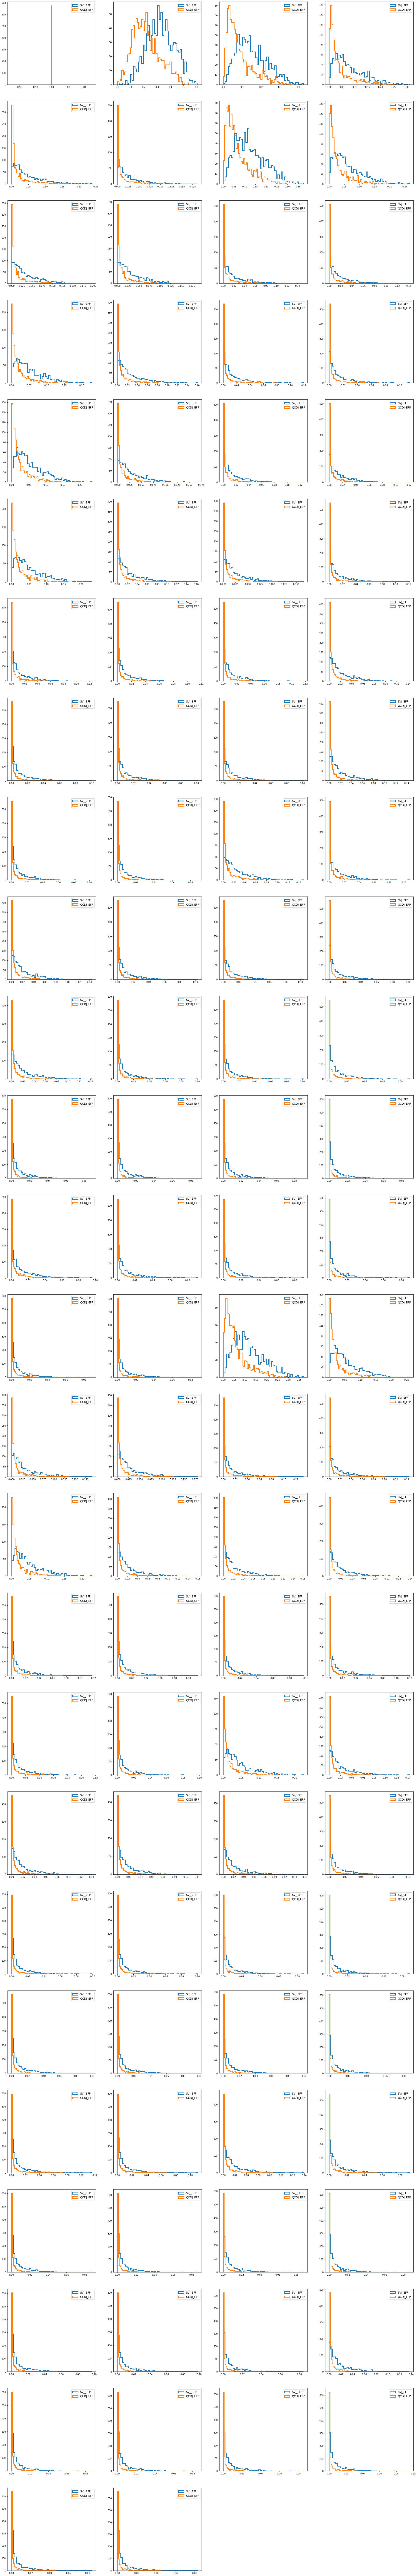

In [27]:
tagsize = 12
bins = 50

NEFP = SVJ_EFP[0].shape[0]
plt.figure(figsize=(4*8, 8*(int(NEFP/4)+1)))
for N in tqdm(range(NEFP)):
    sig = [i[N] for i in SVJ_EFP]
    bkg = [i[N] for i in QCDJ_EFP]
    plt.subplot(int(NEFP/4)+1 ,4, N+1)
    plt.hist(sig, bins=bins, histtype='step', linewidth=3, label = 'SVJ_EFP' )
    plt.hist(bkg, bins=bins, histtype='step', linewidth=3,label = 'QCDJ_EFP' )
    plt.legend(prop={'size': tagsize}) # plot label tag
#     plt.savefig("/home/ja2006203966/script/Network/data/H5/EFP/EDP"+str(N)+".png")
plt.show()

In [17]:
int(4.9)

4